In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.sankey import Sankey

## Read input

In [11]:
df = pd.read_excel('results/FINAL_table1.xlsx')
df.head(2) 

,bin_name,bin_qual,completeness,contamination,domain,phylum,class,order,family,genus,...,file,num_seqs,avg_len,N50,GC(%),cds,tRNA,crispr,cont,hyp
0,V4AA4Y_maxbin.210_sub.fa,MQ,72.23,9.08,Archaea,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,UBA71,...,V4AA4Y_maxbin.210_sub.fa,1853,1041.9,1125,59.21,2521,30,0,1853,2000
1,VZR2LZ_vamb.232152_sub.fa,MQ,70.51,8.99,Archaea,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,UBA71,...,VZR2LZ_vamb.232152_sub.fa,456,3190.7,3973,60.69,1815,38,0,456,1247


In [12]:
print('Median completeness is: ',df['completeness'].median())
print('Median contamination is: ',df['contamination'].median())

Median completeness is:  98.035
Median contamination is:  0.52


In [7]:
df.value_counts('order')

order
Methanomassiliicoccales    191
Methanobacteriales          83
dtype: int64

In [9]:
df[df['order'] == 'Methanobacteriales'].value_counts('genus')

genus
Methanobrevibacter_A    83
dtype: int64

In [8]:
df[df['order'] == 'Methanomassiliicoccales'].value_counts('genus')

genus
UBA71                      119
Methanomethylophilus        41
MX-02                       15
Methanomassiliicoccus_A     13
DTU008                       3
dtype: int64

# Fig.1. An overview of the EstMB MAGdb 

In [10]:
# input BGI 
bgi = pd.read_csv('input/ReadsNumb_BGI.csv')
bgi['sample_name'] = bgi['name'].str.split('_').str[1]
bgi.rename(columns={"name": "BGI_reads_file", "reads_numb": "BGI_reads_numb"}, inplace=True)
bgi = bgi.sort_values(by=['BGI_reads_numb'])

# read meta data
meta = pd.read_excel('input/EstMB_phenotype_data.xlsx', index_col=False)
metaC = meta[['gender', 'Age_at_MBsample', 'BMI']]
metaC2 = meta[['health_status_mapeada', 'birthPlace_typeCity', 'specialDietFollowing']]

In [11]:
bgi['BGI_reads_numb'].median()

53037082.0

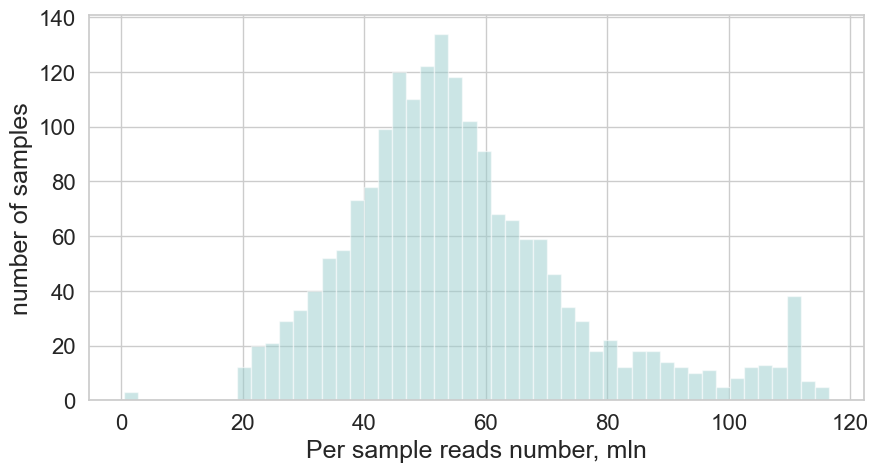

In [32]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")

plt.hist(bgi['BGI_reads_numb']/1000000, bins=50, color='#99CCCD', alpha=0.5)
plt.xlabel('Per sample reads number, mln', fontsize=18)
plt.ylabel('number of samples', fontsize=18)
# label size
plt.tick_params(labelsize=16)
plt.savefig('results/paper/Fig1a_ReadsNumb.svg', bbox_inches='tight')
plt.savefig('results/paper/Fig1a_ReadsNumb.png', bbox_inches='tight')

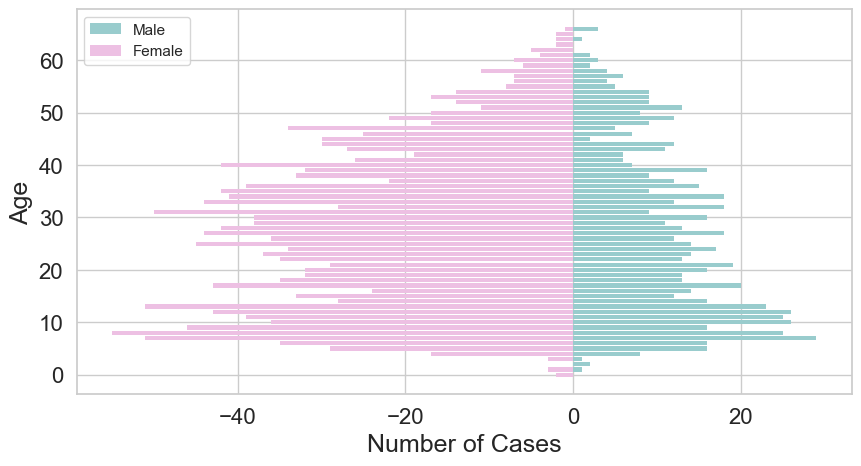

In [33]:
sns.set_theme(style="whitegrid")
# Group the data by 'gender' and 'age' and count the number of cases for each age
age_counts = metaC.groupby(['gender', 'Age_at_MBsample']).size().unstack()
age_counts = age_counts.reset_index(drop=True).T.reset_index(drop=True)

# Create a pyramid chart
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the pyramid chart for males and females
ax.barh(age_counts.index, age_counts[0], label='Male', color='#99CCCD', linewidth=0.01)
ax.barh(age_counts.index, -age_counts[1], label='Female', color='#edc0e3', linewidth=0.01)
ax.set_xlabel('Number of Cases', fontsize=18)
ax.set_ylabel('Age', fontsize=18)
#ax.set_title('Age Distribution Pyramid for Males and Females', fontsize=18)
ax.legend()
plt.tick_params(labelsize=16)
plt.savefig('results/paper/Fig1a_Pyramid.svg', bbox_inches='tight')
plt.savefig('results/paper/Fig1a_Pyramid.png', bbox_inches='tight')

plt.show()

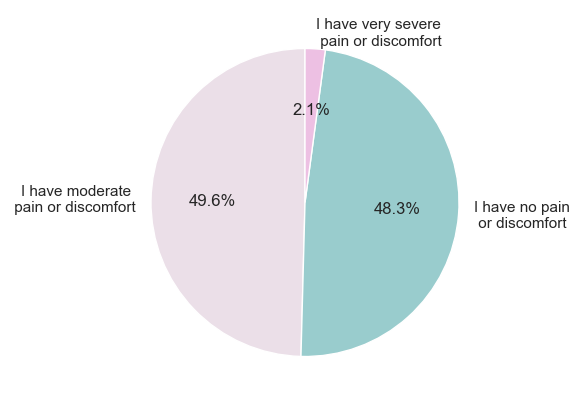

In [34]:
# create a pie chart
plt.figure(figsize=(5, 5))

#labels=metaC2['health_status_mapeada'].value_counts().index
labels=['I have moderate \n pain or discomfort','I have no pain \n or discomfort','I have very severe \n pain or discomfort']

plt.pie(metaC2['health_status_mapeada'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ebdfe8','#99CCCD', '#edc0e3'])

plt.savefig('results/paper/Fig1a_Pie1.svg', bbox_inches='tight')
plt.savefig('results/paper/Fig1a_Pie1.png', bbox_inches='tight')

In [13]:
metaC2['health_status_mapeada'].value_counts().index

Index(['I have moderate pain or discomfort', 'I have no pain or discomfort',
       'I have very severe pain or discomfort'],
      dtype='object')

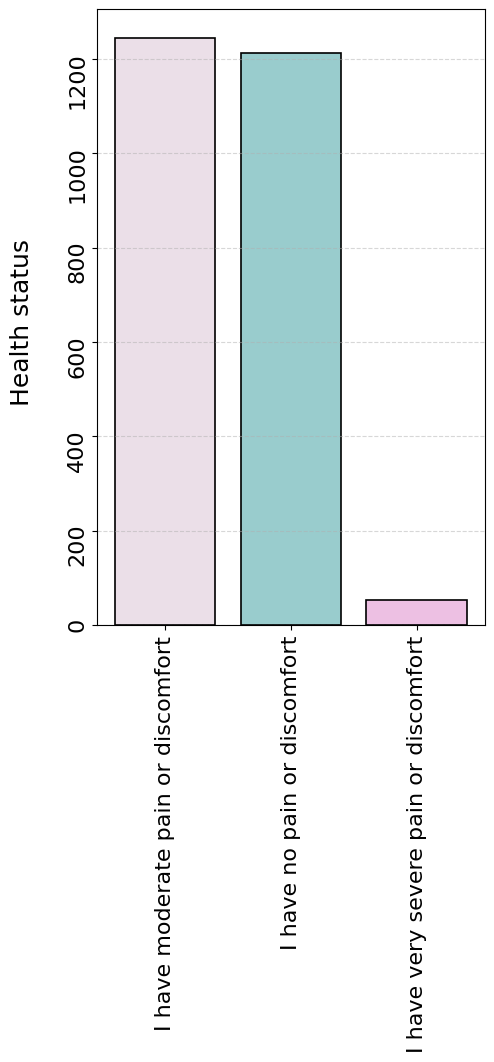

In [31]:
# Create a bar plot
plt.figure(figsize=(5, 8))
bars = plt.bar(metaC2['health_status_mapeada'].value_counts().index, metaC2['health_status_mapeada'].value_counts(), 
               color=['#ebdfe8','#99CCCD', '#edc0e3'], edgecolor='black', linewidth=1.2)

# Customize the plot
plt.ylabel('Health status \n', fontsize=18)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(rotation=90, fontsize=16)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.5, linestyle='--')

plt.savefig('results/Fig1a_Pie1_v2.svg', bbox_inches='tight')
plt.savefig('results/Fig1a_Pie1_v2.png', bbox_inches='tight')

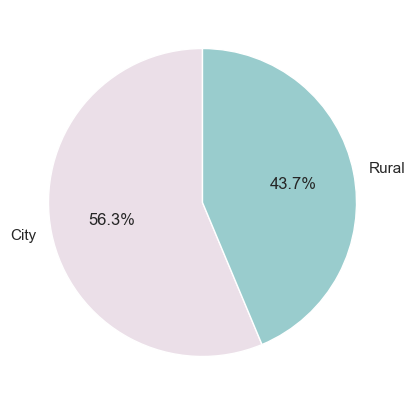

In [35]:
# create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(metaC2['birthPlace_typeCity'].value_counts(), labels=['City','Rural'], autopct='%1.1f%%', startangle=90, colors=['#ebdfe8','#99CCCD', '#edc0e3'])

plt.savefig('results/paper/Fig1a_Pie2.svg', bbox_inches='tight')
plt.savefig('results/paper/Fig1a_Pie2.png', bbox_inches='tight')

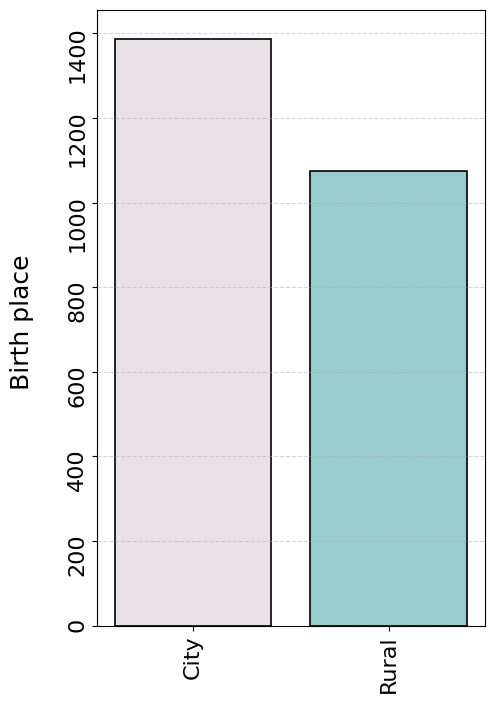

In [36]:
# Create a bar plot
plt.figure(figsize=(5, 8))
bars = plt.bar(['City','Rural'], metaC2['birthPlace_typeCity'].value_counts(), 
               color=['#ebdfe8','#99CCCD', '#edc0e3'], edgecolor='black', linewidth=1.2)

# Customize the plot
plt.ylabel('Birth place \n', fontsize=18)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(rotation=90, fontsize=16)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.5, linestyle='--')

plt.savefig('results/Fig1a_Pie2_v2.svg', bbox_inches='tight')
plt.savefig('results/Fig1a_Pie2_v2.png', bbox_inches='tight')

# Fig.2. Description of final set of Archaea MAGs 

In [10]:
import plotly.io as pio 
# all db taxa
fig = px.sunburst(
    df,
    path=['phylum', 'class', 'order', 'family', 'genus','sp'],
    #values='number_of_bins_per_cluster',
    title="All species, \n GTDB, release214",
    color='class',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=750, 
    height=750
)

fig.write_html("results/paper/Fig2_Archaea_taxa2.html")
pio.write_image(fig, "results/paper/Fig2_Archaea_taxa2.svg") 

In [8]:
taxa = df[['phylum', 'class', 'order', 'family', 'genus','sp']]
taxa

,phylum,class,order,family,genus,sp
0,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,UBA71,UBA71 sp006954425
1,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,UBA71,undefined
2,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii_A
3,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,UBA71,UBA71 sp006954425
4,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Methanomethylophilus,Methanomethylophilus alvus
...,...,...,...,...,...,...
269,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii
270,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii_A
271,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii
272,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomassiliicoccaceae,Methanomassiliicoccus_A,Methanomassiliicoccus_A sp905203995


In [71]:
t1 = taxa[['phylum', 'family']]
t1v = t1.value_counts()
t1v = t1v.to_frame().reset_index().rename(columns={0:'count'})
t1v

,phylum,family,count
0,Thermoplasmatota,Methanomethylophilaceae,175
1,Methanobacteriota,Methanobacteriaceae,83
2,Thermoplasmatota,Methanomassiliicoccaceae,16


In [48]:
t1 = taxa[['order', 'family']]
t1v = t1.value_counts()
t1v = t1v.to_frame().reset_index().rename(columns={0:'count'})
t1v

,order,family,count
0,Methanomassiliicoccales,Methanomethylophilaceae,175
1,Methanobacteriales,Methanobacteriaceae,83
2,Methanomassiliicoccales,Methanomassiliicoccaceae,16


In [47]:
t1 = taxa[['family', 'genus']]
t1v = t1.value_counts()
t1v = t1v.to_frame().reset_index().rename(columns={0:'count'})
t1v

,family,genus,count
0,Methanomethylophilaceae,UBA71,119
1,Methanobacteriaceae,Methanobrevibacter_A,83
2,Methanomethylophilaceae,Methanomethylophilus,41
3,Methanomethylophilaceae,MX-02,15
4,Methanomassiliicoccaceae,Methanomassiliicoccus_A,13
5,Methanomassiliicoccaceae,DTU008,3


In [53]:
t1 = taxa[['genus', 'sp']]
t1v = t1.value_counts()
t1v = t1v.to_frame().reset_index().rename(columns={0:'count'}).sort_values(by=['genus'], ascending=False)
t1v

,genus,sp,count
1,UBA71,UBA71 sp006954425,56
3,UBA71,UBA71 sp006954465,29
4,UBA71,undefined,25
8,UBA71,UBA71 sp905187815,8
14,UBA71,UBA71 sp016296195,1
2,Methanomethylophilus,Methanomethylophilus alvus,41
7,Methanomassiliicoccus_A,Methanomassiliicoccus_A intestinalis,9
9,Methanomassiliicoccus_A,Methanomassiliicoccus_A sp905203995,3
13,Methanomassiliicoccus_A,undefined,1
0,Methanobrevibacter_A,Methanobrevibacter_A smithii,64


In [81]:
import plotly.graph_objects as go
import plotly.io as pio 

plt.figure(figsize=(15, 8))
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Methanomassiliicoccales", "Methanobacteriales", 
               "Methanomethylophilaceae", "Methanomassiliicoccaceae", "Methanobacteriaceae",
               "UBA71", "Methanomethylophilus", "MX-02", "Methanomassiliicoccus_A", "DTU008", "Methanobrevibacter_A",
               "UBA71 sp006954425", "UBA71 sp006954465", "undefined", "UBA71 sp905187815", "UBA71 sp016296195", 
               "Methanomethylophilus alvus", 
               "MX-02 sp006954405", 
               "DTU008 sp001421185","undefined",
               "Methanomassiliicoccus_A intestinalis","Methanomassiliicoccus_A sp905203995","undefined",
               "Methanobrevibacter_A smithii","Methanobrevibacter_A smithii_A","Methanobrevibacter_A woesei",
               "Thermoplasmatota", "Methanobacteriota", 
               "Methanomassiliicoccaceae", "Methanobacteriaceae"],
      color = "#edc0e3"
    ),
    link = dict(
      source = [0,0,1,2,2,2,3,3,4,5,5,5,5,5,6,7,9,9,8,8,8,10,10,10,28,29,26,27], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,0,1,28,29],
      value = [175,16,83,119,41,15,13,3,83,56,29,25,8,1,41,15,2,1,9,3,1,64,17,2,191,83,191,83]
  ))])

fig.update_layout(title_text="Archaea MAGs", font_size=10)
fig.show()

pio.write_image(fig, "results/Fig2_Archaea_taxa_v3.svg")
pio.write_image(fig, "results/Fig2_Archaea_taxa_v3.png", width=1000, height=1000, scale=2)

<Figure size 1500x800 with 0 Axes>

/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning:

8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



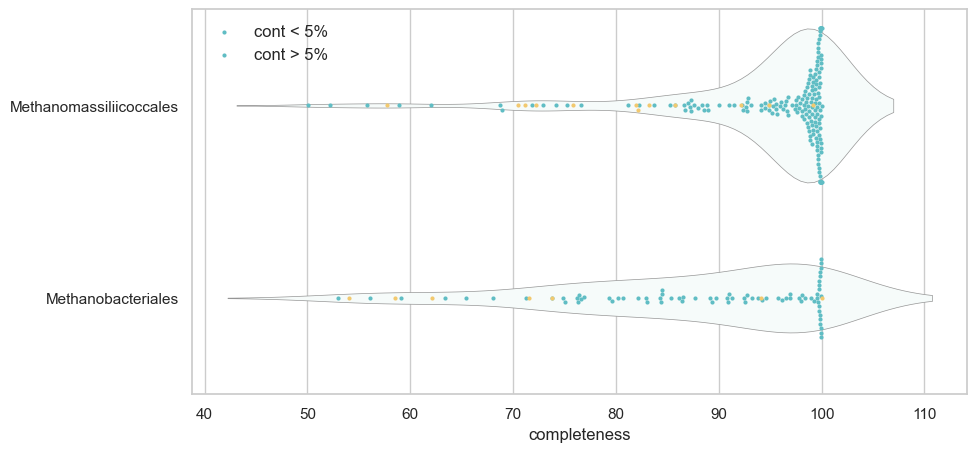

In [15]:
df = df[df['completeness'] > 10]
# data slice
df['length2'] = df['length']/1000000
df1 = df[df['contamination'] < 5]
df2 = df[df['contamination'] >= 5]

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.swarmplot(y="order", x="completeness", data=df1, size=3, color='#60BDC4')
ax = sns.swarmplot(y="order", x="completeness", data=df2, size=3, color='#F2C96F')

ax = sns.violinplot(y="order", x="completeness", data=df, color='#f5fcfa',linewidth=0.5, inner=None)
plt.legend(['cont < 5%', 'cont > 5%'], loc='upper left', fontsize=12, frameon=False)
plt.ylabel('')

plt.savefig('results/paper/Fig2_completness_cm2.png', dpi=300, bbox_inches='tight')
plt.savefig('results/paper/Fig2_completness_cm2.svg', bbox_inches='tight')



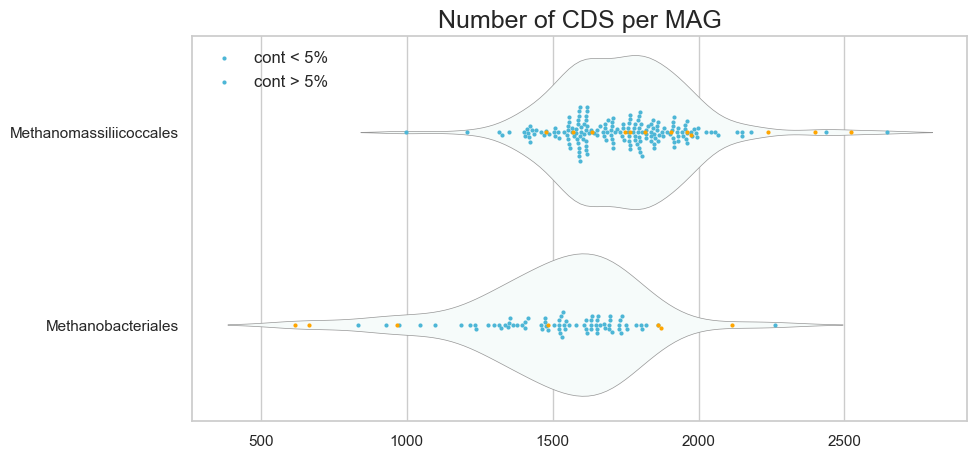

In [20]:
df1 = df[df['contamination'] < 5]
df2 = df[df['contamination'] >= 5]

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

ax = sns.swarmplot(y="order", x="cds", data=df1, size=3, color='#4db6d6')
ax = sns.swarmplot(y="order", x="cds", data=df2, size=3, color='orange')
ax = sns.violinplot(y="order", x="cds", data=df, color='#f5fcfa',linewidth=0.5, inner=None)

plt.legend(['cont < 5%', 'cont > 5%'], loc='upper left', fontsize=12, frameon=False)
plt.ylabel('')
plt.xlabel('')
plt.title('Number of CDS per MAG', fontsize=18)
plt.savefig('results/Fig3_cds.png', dpi=300, bbox_inches='tight')

/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


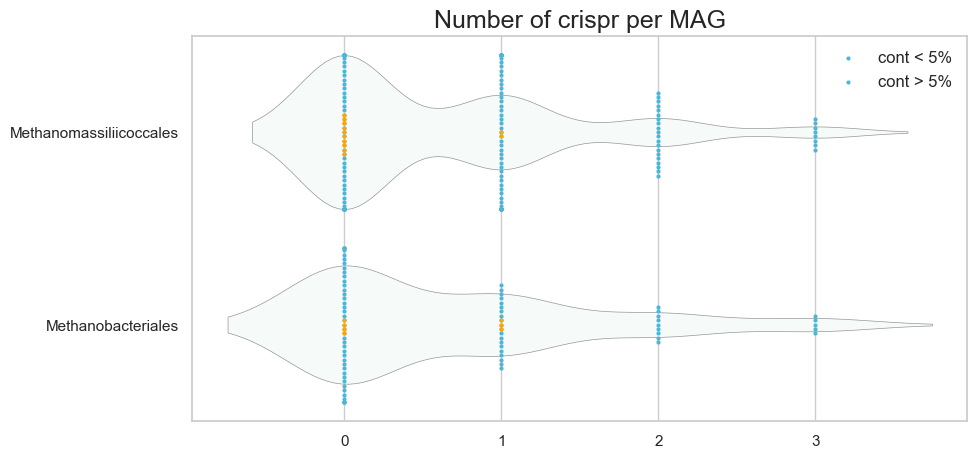

In [14]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

ax = sns.swarmplot(y="order", x="crispr", data=df1, size=3, color='#4db6d6')
ax = sns.swarmplot(y="order", x="crispr", data=df2, size=3, color='orange')
ax = sns.violinplot(y="order", x="crispr", data=df, color='#f5fcfa',linewidth=0.5, inner=None)

plt.legend(['cont < 5%', 'cont > 5%'], loc='upper right', fontsize=12, frameon=False)
plt.ylabel('')
plt.xlabel('')
plt.title('Number of crispr per MAG', fontsize=18)
plt.savefig('results/Fig3_crispr.png', dpi=300, bbox_inches='tight')

/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


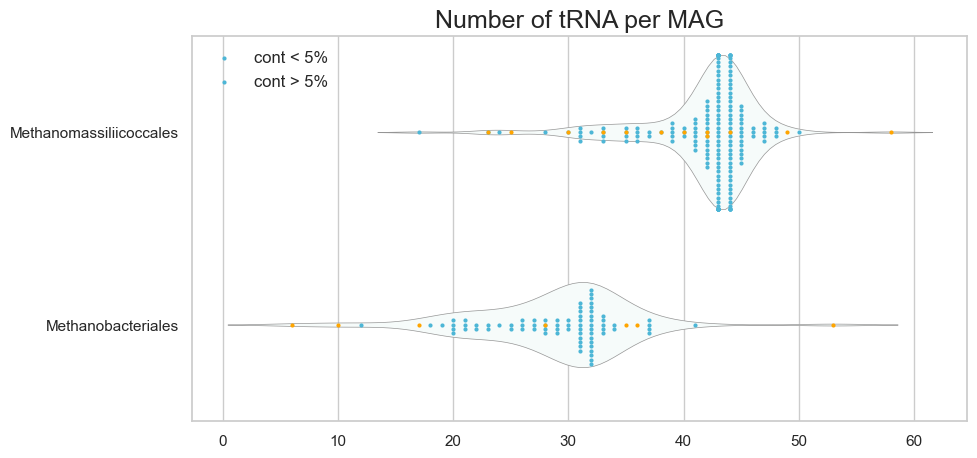

In [15]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

ax = sns.swarmplot(y="order", x="tRNA", data=df1, size=3, color='#4db6d6')
ax = sns.swarmplot(y="order", x="tRNA", data=df2, size=3, color='orange')
ax = sns.violinplot(y="order", x="tRNA", data=df, color='#f5fcfa',linewidth=0.5, inner=None)

plt.legend(['cont < 5%', 'cont > 5%'], loc='upper left', fontsize=12, frameon=False)
plt.ylabel('')
plt.xlabel('')
plt.title('Number of tRNA per MAG', fontsize=18)
plt.savefig('results/Fig3_tRNA.png', dpi=300, bbox_inches='tight')

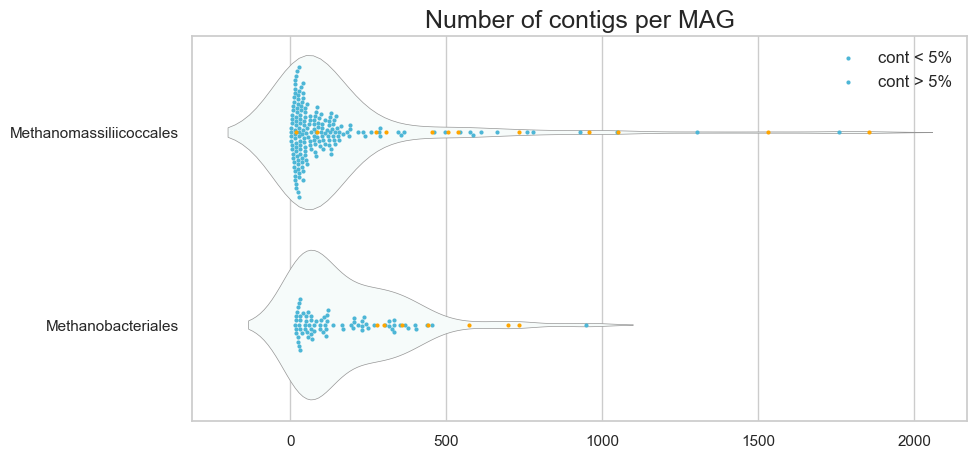

In [16]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

ax = sns.swarmplot(y="order", x="cont", data=df1, size=3, color='#4db6d6')
ax = sns.swarmplot(y="order", x="cont", data=df2, size=3, color='orange')
ax = sns.violinplot(y="order", x="cont", data=df, color='#f5fcfa',linewidth=0.5, inner=None)

plt.legend(['cont < 5%', 'cont > 5%'], loc='upper right', fontsize=12, frameon=False)
plt.ylabel('')
plt.xlabel('')
plt.title('Number of contigs per MAG', fontsize=18)
plt.savefig('results/Fig3_cont.png', dpi=300, bbox_inches='tight')

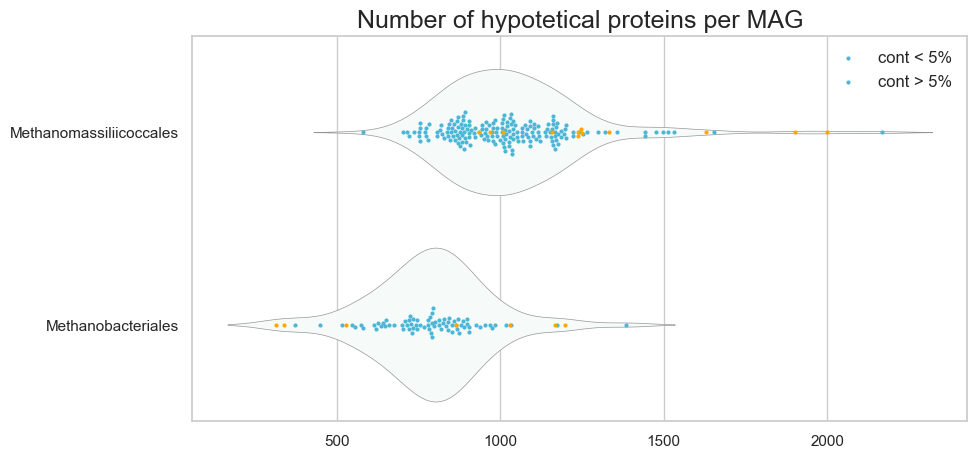

In [17]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

ax = sns.swarmplot(y="order", x="hyp", data=df1, size=3, color='#4db6d6')
ax = sns.swarmplot(y="order", x="hyp", data=df2, size=3, color='orange')
ax = sns.violinplot(y="order", x="hyp", data=df, color='#f5fcfa',linewidth=0.5, inner=None)

plt.legend(['cont < 5%', 'cont > 5%'], loc='upper right', fontsize=12, frameon=False)
plt.ylabel('')
plt.xlabel('')
plt.title('Number of hypotetical proteins per MAG', fontsize=18)
plt.savefig('results/Fig3_hyp.png', dpi=300, bbox_inches='tight')

In [19]:
df['hyp_perc']

0      79.333598
1      68.705234
2      62.674544
3      63.303995
4      65.634837
         ...    
269    50.000000
270    47.245283
271    51.103896
272    52.549286
273    48.194353
Name: hyp_perc, Length: 274, dtype: float64

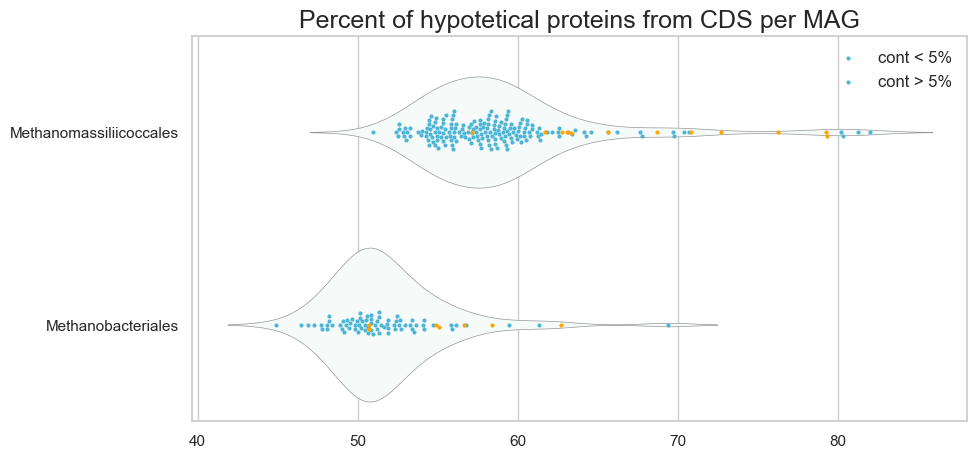

In [21]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

df['hyp_perc'] = df['hyp']/df['cds']*100

ax = sns.swarmplot(y="order", x="hyp_perc", data=df1, size=3, color='#4db6d6')
ax = sns.swarmplot(y="order", x="hyp_perc", data=df2, size=3, color='orange')
ax = sns.violinplot(y="order", x="hyp_perc", data=df, color='#f5fcfa',linewidth=0.5, inner=None)

plt.legend(['cont < 5%', 'cont > 5%'], loc='upper right', fontsize=12, frameon=False)
plt.ylabel('')
plt.xlabel('')
plt.title('Percent of hypotetical proteins from CDS per MAG', fontsize=18)
plt.savefig('results/Fig3_hyp_perc.png', dpi=300, bbox_inches='tight')

In [33]:
df_Methanomassiliicoccales = df[df['order'] == 'Methanomassiliicoccales']
df_Methanobacteriales = df[df['order'] == 'Methanobacteriales']

print('Median CDS number is: ',df['cds'].median())
print('-- Median CDS number for Methanomassiliicoccales is: ',df_Methanomassiliicoccales['cds'].median())
print('-- Median CDS number for Methanobacteriales is: ',df_Methanobacteriales['cds'].median(), '\n')

print('Median tRNA number is: ',df['tRNA'].median())
print('-- Median tRNA number for Methanomassiliicoccales is: ',df_Methanomassiliicoccales['tRNA'].median())
print('-- Median tRNA number for Methanobacteriales is: ',df_Methanobacteriales['tRNA'].median(), '\n')

print('Median hypotetical proteins percent is: ',df['hyp_perc'].median())
print('-- Median hypotetical proteins percent for Methanomassiliicoccales is: ',df_Methanomassiliicoccales['hyp_perc'].median())
print('-- Median hypotetical proteins percent for Methanobacteriales is: ',df_Methanobacteriales['hyp_perc'].median(), '\n')

Median CDS number is:  1677.5
-- Median CDS number for Methanomassiliicoccales is:  1746.0
-- Median CDS number for Methanobacteriales is:  1540.0 

Median tRNA number is:  42.0
-- Median tRNA number for Methanomassiliicoccales is:  43.0
-- Median tRNA number for Methanobacteriales is:  31.0 

Median hypotetical proteins percent is:  56.14087259157881
-- Median hypotetical proteins percent for Methanomassiliicoccales is:  58.13672111312764
-- Median hypotetical proteins percent for Methanobacteriales is:  50.96085409252669 



In [34]:
df.to_excel('results/FINAL_table1.xlsx', index=False)